In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
data = pd.read_csv('C:\oasistask5\Advertising.csv')

# Drop the unnecessary index column
data = data.drop('Unnamed: 0', axis=1)

# Quick look at the data
print(data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Admin\AppData\Local\Temp\ipykernel_5588\4187455913.py:2: SyntaxWarning: invalid escape sequence '\o'
  data = pd.read_csv('C:\oasistask5\Advertising.csv')


In [5]:
# Features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Predictor variables
y = data['Sales']  # Target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Initialize Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)


In [7]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)


In [8]:
# Linear Regression evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression MAE: {mae_linear}')

# Random Forest evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest MAE: {mae_rf}')


Linear Regression MSE: 3.174097353976107
Linear Regression MAE: 1.4607567168117606
Random Forest MSE: 0.5910253749999989
Random Forest MAE: 0.6207249999999989


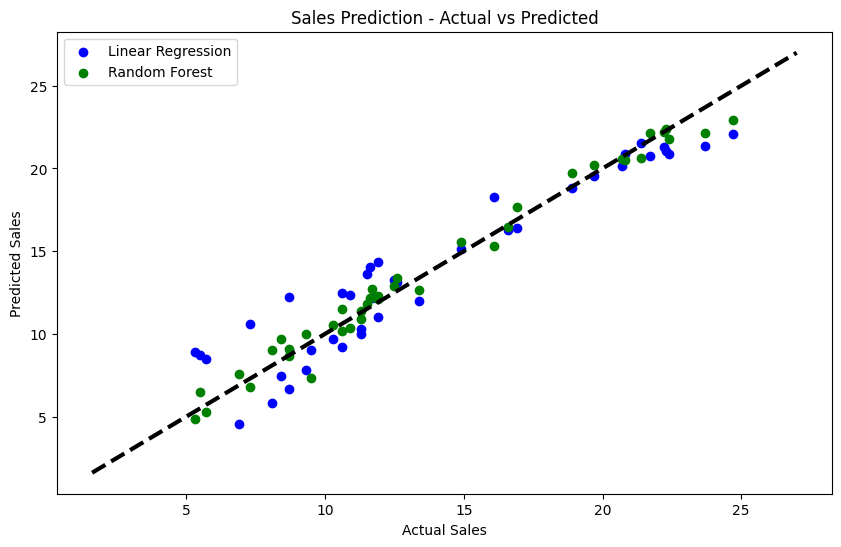

In [9]:
# Plot true sales vs predicted sales for Linear Regression and Random Forest
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_linear, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_rf, label='Random Forest', color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)  # Diagonal line for reference
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.title('Sales Prediction - Actual vs Predicted')
plt.show()


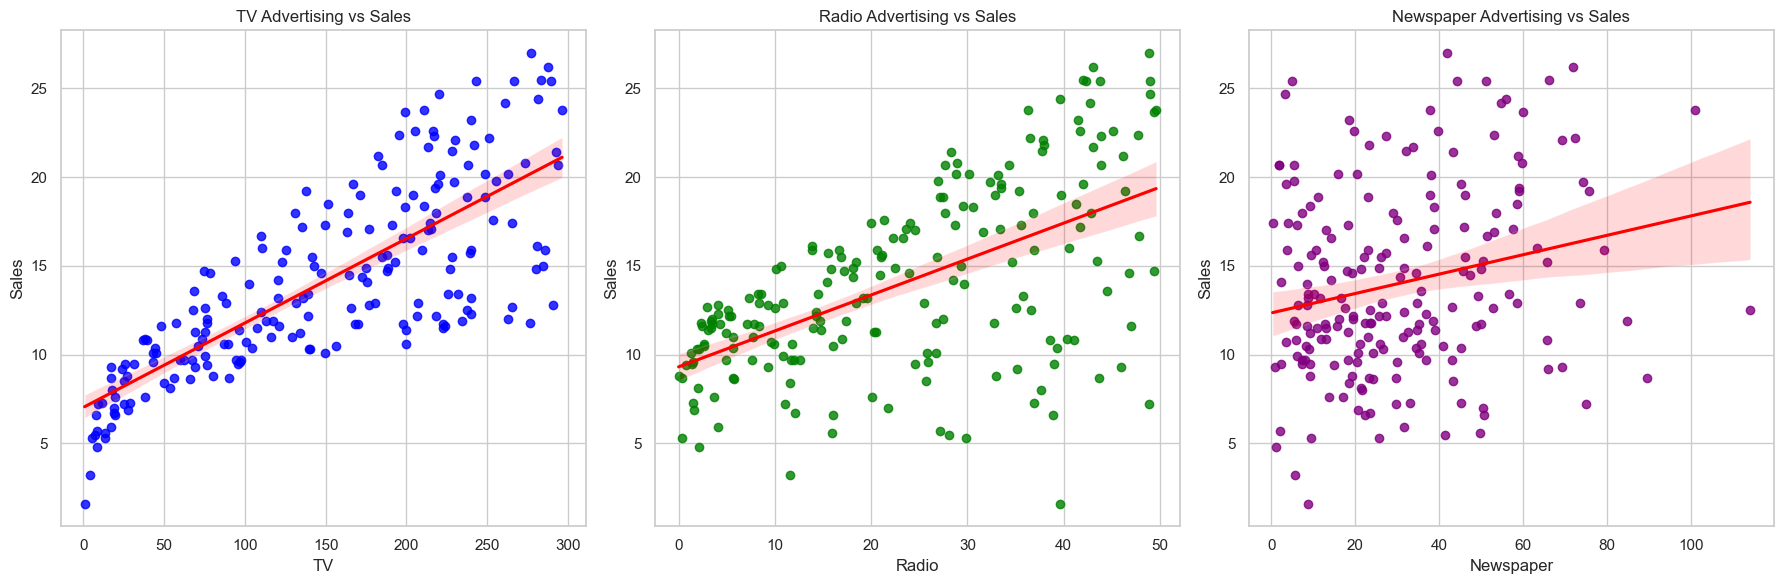

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for each factor
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot TV vs Sales
sns.regplot(x='TV', y='Sales', data=data, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('TV Advertising vs Sales')

# Plot Radio vs Sales
sns.regplot(x='Radio', y='Sales', data=data, ax=axes[1], scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
axes[1].set_title('Radio Advertising vs Sales')

# Plot Newspaper vs Sales
sns.regplot(x='Newspaper', y='Sales', data=data, ax=axes[2], scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
axes[2].set_title('Newspaper Advertising vs Sales')

# Display the plot
plt.tight_layout()
plt.show()
